In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student_labels/train.csv")

# 1. Age Distribution

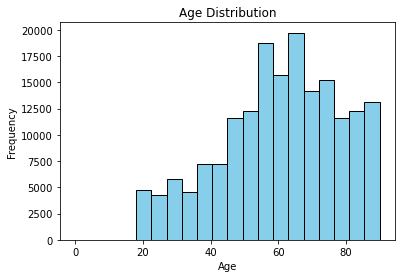

In [2]:
plt.figure()
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 2. Gender Distribution

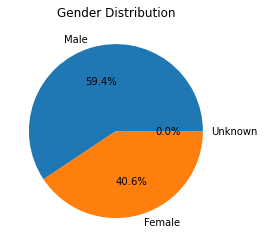

In [3]:
gender_counts = df["Sex"].value_counts()
plt.figure()
gender_counts.plot.pie(autopct="%.1f%%")
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# 3. Medical Conditions Distribution

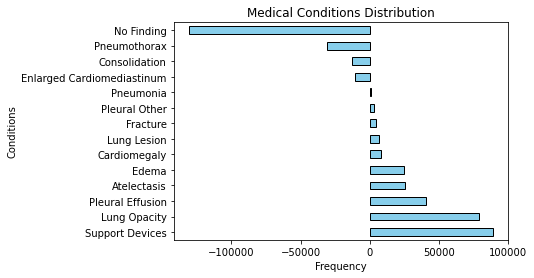

In [4]:
conditions = ["No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema",
              "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", "Pleural Other",
              "Fracture", "Support Devices"]
condition_counts = df[conditions].sum().sort_values(ascending=False)
plt.figure()
condition_counts.plot.barh(color="skyblue", edgecolor="black")
plt.title("Medical Conditions Distribution")
plt.xlabel("Frequency")
plt.ylabel("Conditions")
plt.show()

# 4. Condition by Gender

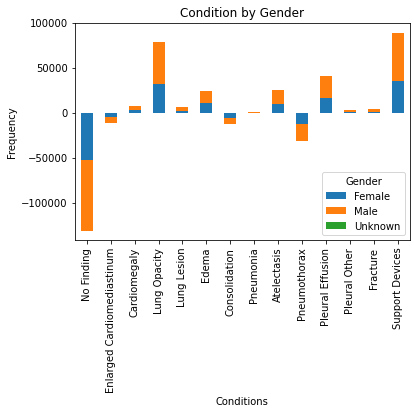

In [5]:
condition_gender_counts = df.groupby("Sex")[conditions].sum()
condition_gender_counts.T.plot.bar(stacked=True)
plt.title("Condition by Gender")
plt.xlabel("Conditions")
plt.ylabel("Frequency")
plt.legend(title="Gender")
plt.show()

# 5. Condition by Age Group

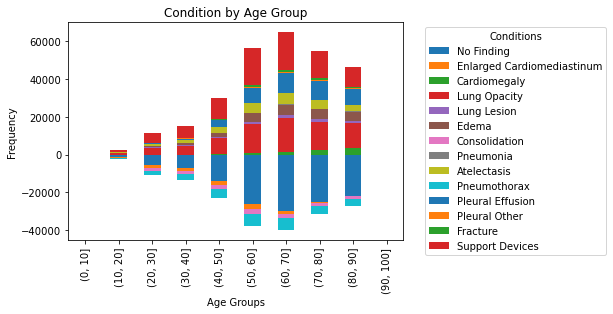

In [6]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins)
condition_age_counts = df.groupby("AgeGroup")[conditions].sum()
condition_age_counts.plot.bar(stacked=True)
plt.title("Condition by Age Group")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.legend(title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 6. Frontal/Lateral X-ray Distribution

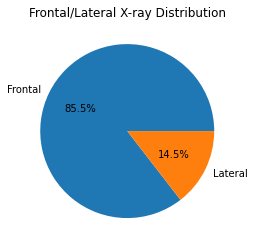

In [7]:
frontal_lateral_counts = df["Frontal/Lateral"].value_counts()
plt.figure()
frontal_lateral_counts.plot.pie(autopct="%.1f%%")
plt.title("Frontal/Lateral X-ray Distribution")
plt.ylabel("")
plt.show()

# 7. AP/PA Distribution

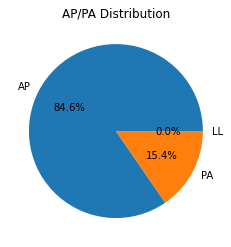

In [8]:
ap_pa_counts = df["AP/PA"].value_counts()
plt.figure()
ap_pa_counts.plot.pie(autopct="%.1f%%")
plt.title("AP/PA Distribution")
plt.ylabel("")
plt.show()

# 8. Correlation Matrix

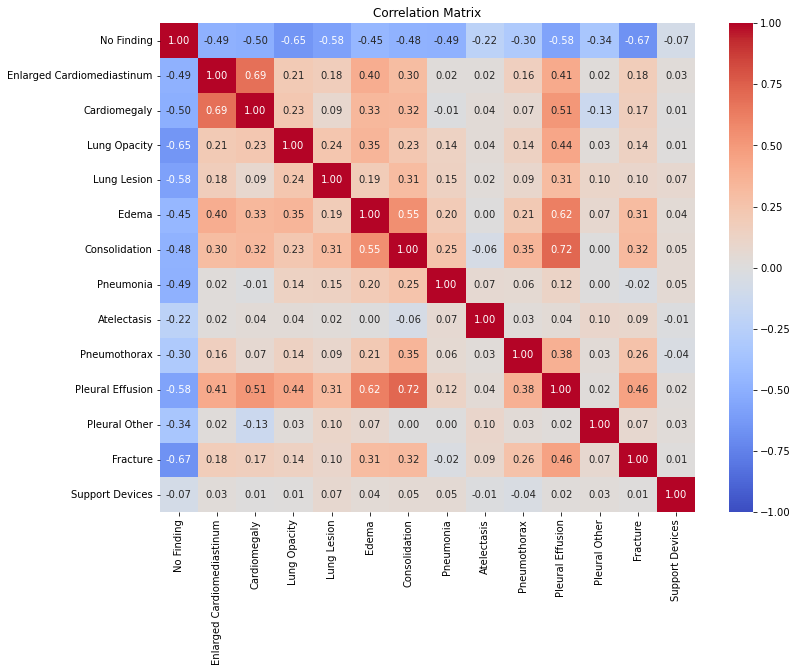

In [9]:
corr_matrix = df[conditions].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()